# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()


197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
df.columns.str.lower()

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [5]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

# Change the Index to be the Line Names

In [6]:
df.set_index('LINENAME', inplace=True)

In [7]:
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [8]:
df.reset_index(inplace=True)

In [9]:
df.tail()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [10]:
df['Num_Lines'] = df['LINENAME'].map(len)

In [11]:
df.sort_values(by='Num_Lines',ascending=False, inplace=True)

## Write a function to clean a column name.

In [12]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [13]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [14]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

In [17]:
df.columns = df.columns.str.title()

In [18]:
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [19]:
type(df['Date'][0])

str

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [36]:
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,DayOfWeek
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,3
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,2
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,0
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,0
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,1


In [24]:
df.sort_index()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,DayOfWeek
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,7,Saturday
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,7,Sunday
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,7,Sunday
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,7,Sunday
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,7,Sunday


In [31]:
df['Time'].nunique()

12190

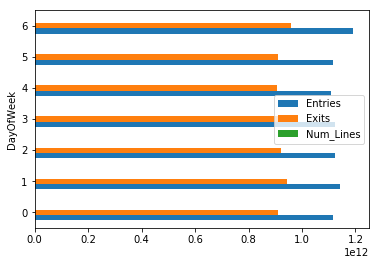

In [37]:
df.groupby(by='DayOfWeek').sum().plot.barh()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [38]:
grouped = df.groupby(by='DayOfWeek').sum()

In [39]:
grouped

,Entries,Exits,Num_Lines
DayOfWeek,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


In [40]:
grouped.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='DayOfWeek')

In [50]:
grouped.reset_index(inplace=True)

In [51]:
grouped

,DayOfWeek,Entries,Exits,Num_Lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573
5,5,1115661545514,909142081474,74725
6,6,1192306179082,959223750461,75306


In [53]:
type(grouped['DayOfWeek'][0])

numpy.int64

In [55]:
grouped['IsWknd'] = grouped['DayOfWeek'].map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})

In [56]:
grouped

,DayOfWeek,Entries,Exits,Num_Lines,IsWknd
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False
2,2,1123655222441,920630864687,75713,False
3,3,1122723988662,920691927110,76607,False
4,4,1110224700078,906799065337,75573,False
5,5,1115661545514,909142081474,74725,True
6,6,1192306179082,959223750461,75306,True


In [58]:
weekend = grouped.groupby('IsWknd').mean()

In [59]:
weekend

,DayOfWeek,Entries,Exits,Num_Lines
IsWknd,,,,
False,2.0,1.122831e+12,9.204581e+11,76261.2
True,5.5,1.153984e+12,9.341829e+11,75015.5


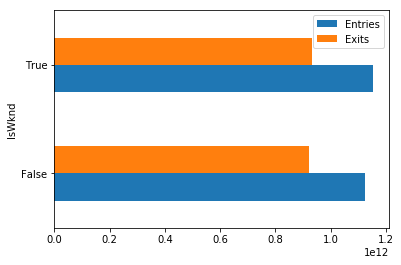

In [64]:
weekend[['Entries', 'Exits']].plot(kind='barh')

# Drop a couple of columns

In [ ]:
# Your code here